In [1]:
# importy
import numpy as np
import matplotlib.pyplot as plt
from scipy import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

## Zadanie 1

Proszę stworzyć zestaw punktów należących do dwóch klas: **K1** i **K2**.  Punkty z klasy **K1** powinny być losowane z rozkładu normalnego o średniej **[0, -1]** i wariancji **1**. Punkty z klasy **K2** powinny pochodzić z rozkładu normalnego o średniej **[1, 1]** i wariancji **1**. Całościowo zbiór powinien zawierać **200 punktów**, po 100 dla każdej klasy.   
Należy wybrać **zbiory uczące** o następującej liczebności: **5, 10, 20 oraz 100**.  Dla każdego wariantu podziału znalezy znaleźć równanie **prostej**, która najlepiej oddziela klasy **K1** i **K2**. Uzyskaną prostą należy
zaprezentować razem z punktami testowymi i linią (hiperpłaszczyzną), która oddziela klasy. Następnie należy ocenić to jak dobrze klasyfikator działa od proporcji danych uczących i testujących.

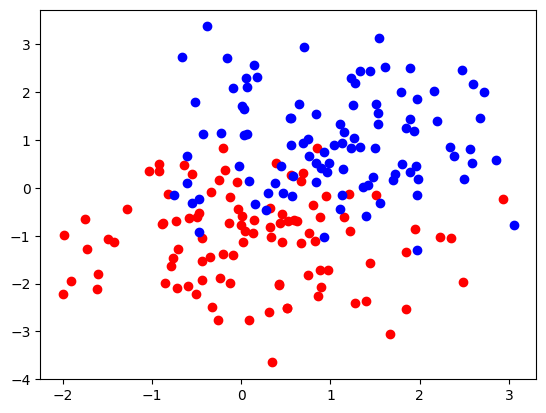

In [2]:
# zestawy punktów dla klas K1 i K2

n_points = 100 # per klasa

# parametry
mean_K1 = [0, -1]
mean_K2 = [1, 1]
cov = 1

# punkty
K1 = np.random.normal(mean_K1, cov, (n_points, 2)) # red
K2 = np.random.normal(mean_K2, cov, (n_points, 2)) # blue

plt.scatter(K1[:, 0], K1[:, 1], c='r')
plt.scatter(K2[:, 0], K2[:, 1], c='b')

In [3]:
# dane (K1 + K2) i etykiety

X = np.concatenate((K1, K2))
y = np.array([0]*100 + [1]*100)
# pierwsze 100 -> K1 (0), drugie 100 -> K2 (1)

Size: 5, score: 0.8410


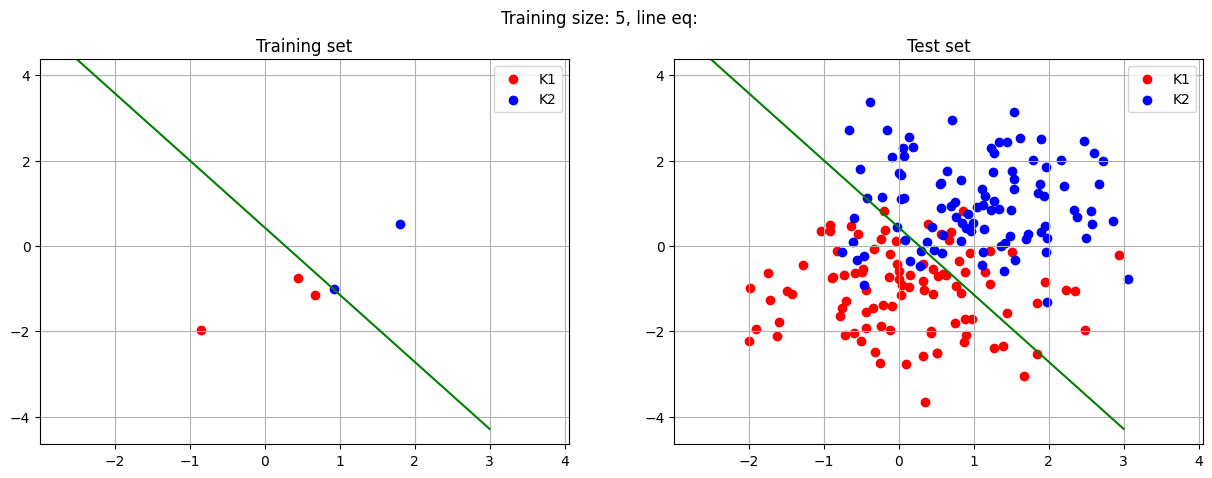

Size: 10, score: 0.7053


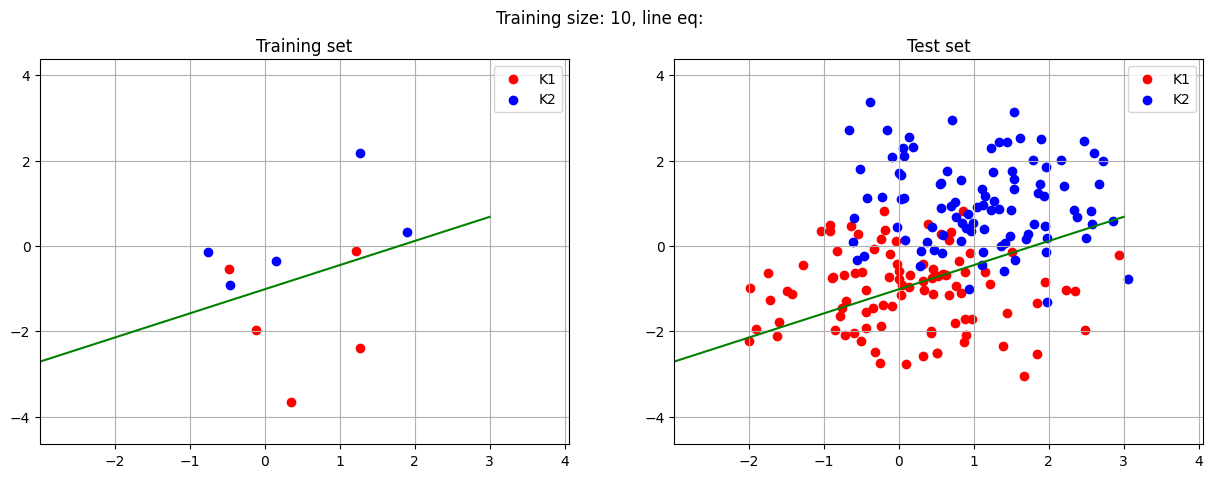

Size: 20, score: 0.8722


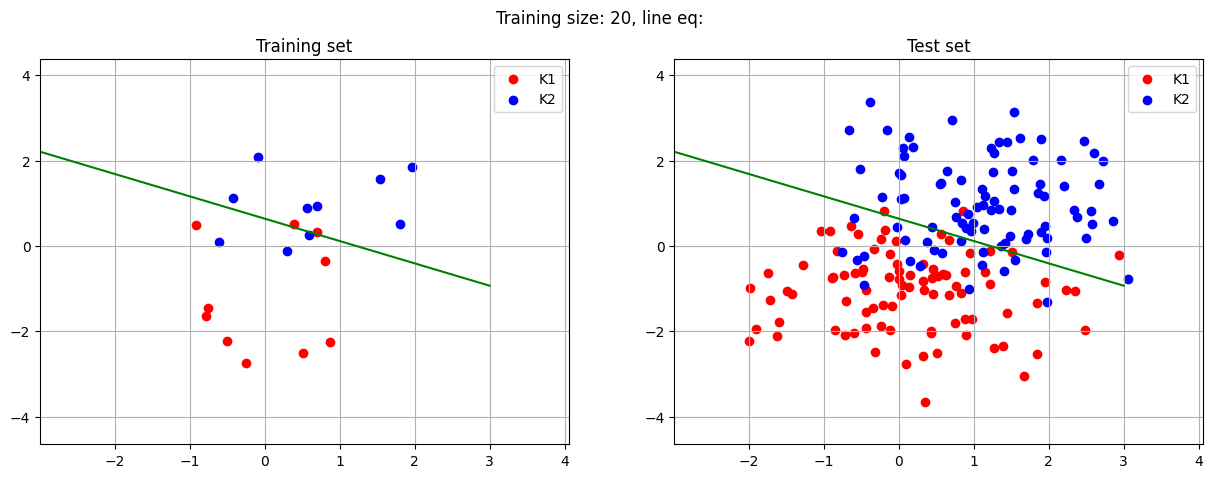

Size: 100, score: 0.8800


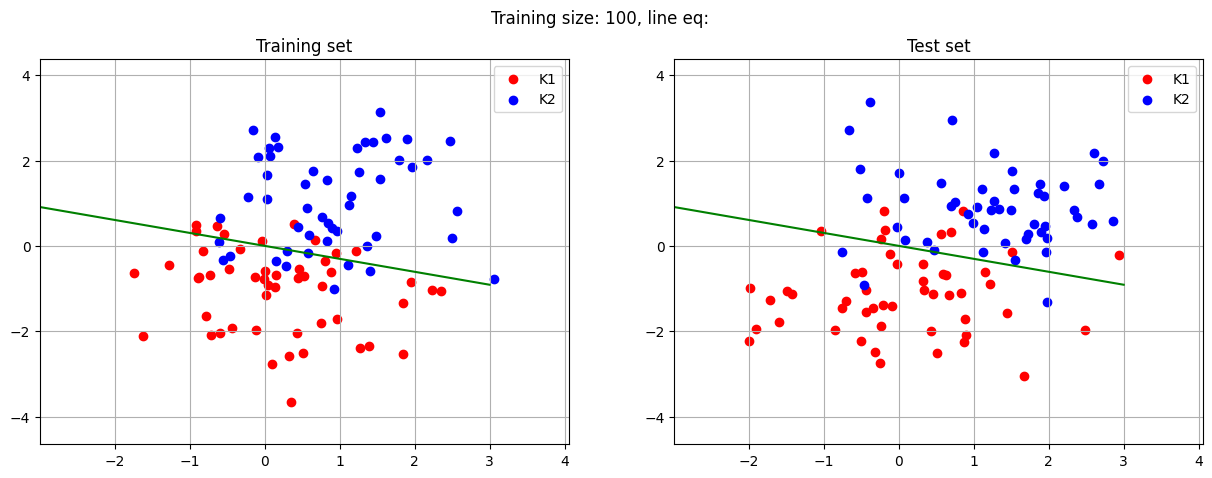

In [37]:
# trenowanie

# przedziały osi na wykresach
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

train_sizes = [5, 10, 20, 100]

for train_size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y)

    neuron = Perceptron(tol = 1e-3, max_iter = 20)

    # uczymy
    neuron.fit(X_train, y_train)

    # testujemy
    print(f'Size: {train_size}, score: {neuron.score(X_test, y_test):.4f}')

    x1 = np.linspace(-3, 3, 200)
    x2 = -(1./neuron.coef_[0][1])*(neuron.coef_[0][0]*x1+neuron.intercept_[0])

    # rysujemy
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    fig.suptitle(f'Training size: {train_size}, line eq: ')

    # training set
    ax1.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='r', label='K1')
    ax1.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='b', label='K2')
    ax1.plot(x1, x2, c='g')
    ax1.legend()
    ax1.set_title('Training set')
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.grid(True)

    # test set
    ax2.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='r', label='K1')
    ax2.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='b', label='K2')
    ax2.plot(x1, x2, c='g')
    ax2.legend()
    ax2.set_title('Test set')
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.grid(True)

    plt.show()

## Zadanie 2

Analiza próbek benzyny wykazała że może ona być przypisana do **dwóch klas** czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla **pięciokrotnego** uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

         c_1    c_2      c_3 purity_class
0    645.795  0.151  155.570            B
1   1334.246  0.022  154.000            B
2   1102.023  0.122  155.495            B
3    316.575  0.070  152.951            B
4   -427.025  0.199  150.674            A
..       ...    ...      ...          ...
95  -115.427  0.268  150.050            A
96  -832.368 -0.043  155.309            A
97  1565.969  0.270  153.176            B
98 -1435.530  0.093  154.408            A
99 -1983.326  0.054  151.766            A

[100 rows x 4 columns]


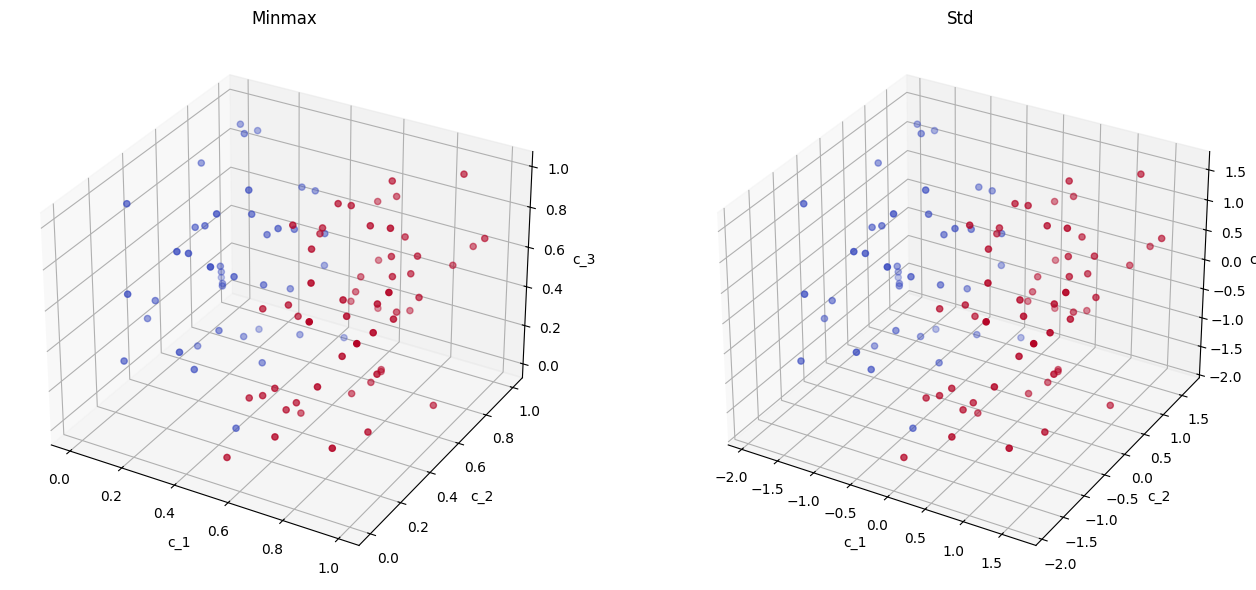

In [33]:
# ładowanie fuel.txt
import os
import pandas as pd

# załaduj dane z fuel.txt jako DataFrame
fuel_data = pd.read_csv(os.path.join('data', 'fuel.txt'))
print(fuel_data)
type(fuel_data)

# zamiana labeli: A -> 0, B -> 1
fuel_data['purity_class'] = fuel_data['purity_class'].map({'A': 0, 'B': 1})

# dane
Xf = fuel_data.drop('purity_class', axis=1).to_numpy()
Yf = fuel_data['purity_class'].to_numpy()

# skalowanie minmax
X_min = Xf.min(axis=0)
X_max = Xf.max(axis=0)
X_minmax_scaled = (Xf - X_min) / (X_max - X_min)

# skalowanie do rozkładu standardowego
X_mean = Xf.mean(axis=0)
X_std = Xf.std(axis=0)
X_std_scaled = (Xf - X_mean) / X_std

# wizualizacja
df_minmax = pd.DataFrame(X_minmax_scaled, columns=['c_1', 'c_2', 'c_3'])
df_minmax['purity_class'] = Yf

df_std = pd.DataFrame(X_std_scaled, columns=['c_1', 'c_2', 'c_3'])
df_std['purity_class'] = Yf

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
minmax_scatter = ax1.scatter(df_minmax['c_1'], df_minmax['c_2'], df_minmax['c_3'], c=df_minmax['purity_class'], cmap='coolwarm')
ax1.set_ylabel('c_2')
ax1.set_xlabel('c_1')
ax1.set_zlabel('c_3')
ax1.set_title('Minmax')

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(df_std['c_1'], df_std['c_2'], df_std['c_3'], c=df_std['purity_class'], cmap='coolwarm')
ax2.set_xlabel('c_1')
ax2.set_ylabel('c_2')
ax2.set_zlabel('c_3')
ax2.set_title('Std')

plt.tight_layout()
plt.show()

Iteracja: 1, score: 0.9600
Iteracja: 2, score: 0.9600
Iteracja: 3, score: 0.9600
Iteracja: 4, score: 0.9600
Iteracja: 5, score: 0.9600


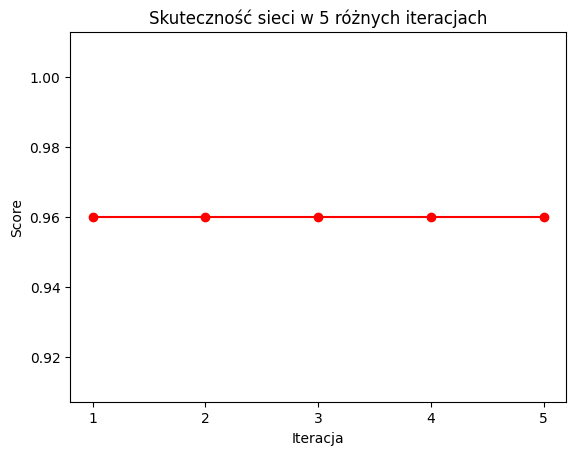

In [113]:
from sklearn.metrics import accuracy_score

# trenowanie
accuracy_scores = []

for i in range(5):
    neuron = Perceptron(tol = 1e-3, max_iter = 20)
    neuron.fit(X_minmax_scaled, Yf)
    Y_pred = neuron.predict(X_minmax_scaled)
    accuracy = accuracy_score(Yf, Y_pred)
    accuracy_scores.append(accuracy)
    print(f'Iteracja: {i+1}, score: {accuracy:.4f}')

# wykres
plt.plot(range(1, 6), accuracy_scores, marker='o', linestyle='-', color='r')
plt.xlabel('Iteracja')
plt.ylabel('Score')
plt.title('Skuteczność sieci w 5 różnych iteracjach')
plt.xticks(range(1, 6))
plt.show()

## Zadanie 3

Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris(). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji **80%/20%**. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

Iteracja: 1, score: 0.8667
Iteracja: 2, score: 0.8000
Iteracja: 3, score: 0.9000
Iteracja: 4, score: 0.9333
Iteracja: 5, score: 0.9000


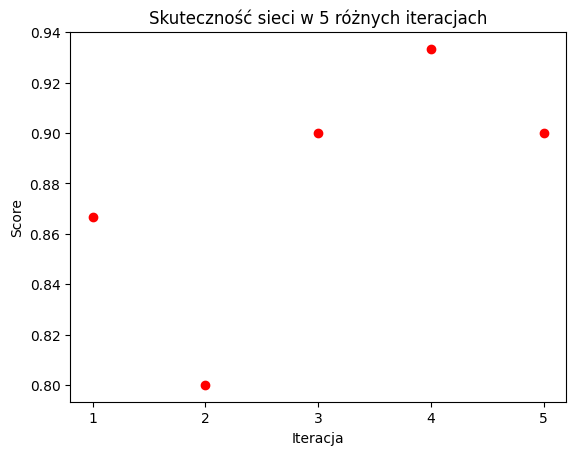

<Figure size 300x300 with 0 Axes>

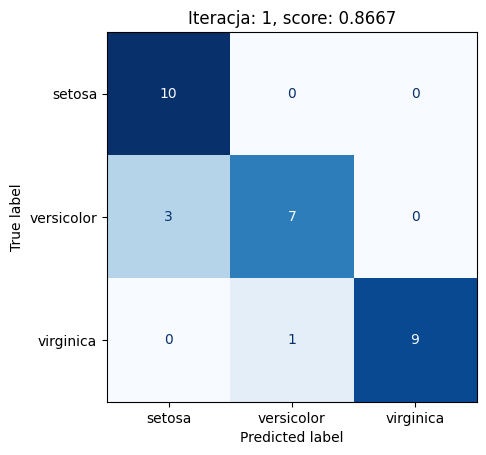

<Figure size 300x300 with 0 Axes>

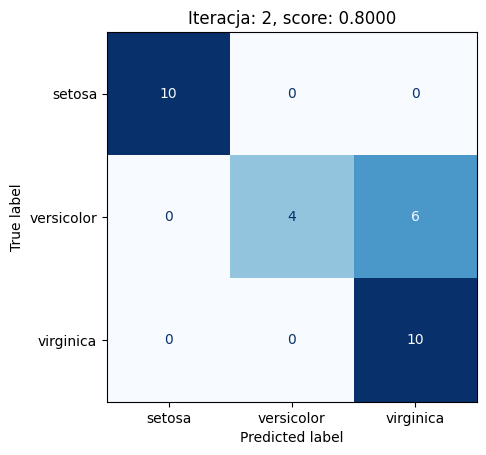

<Figure size 300x300 with 0 Axes>

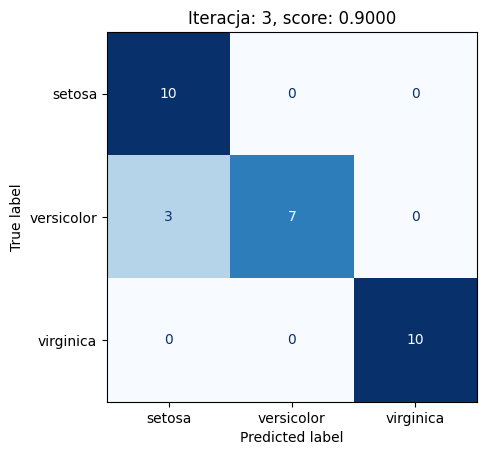

<Figure size 300x300 with 0 Axes>

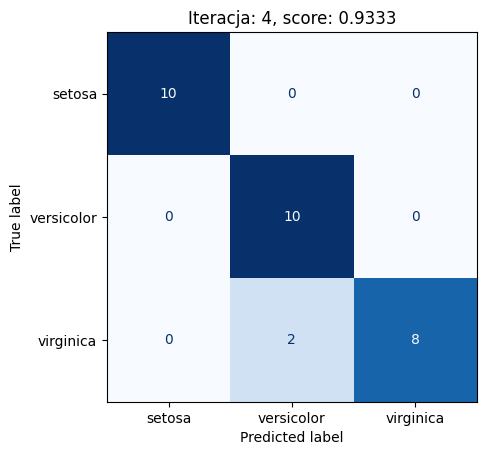

<Figure size 300x300 with 0 Axes>

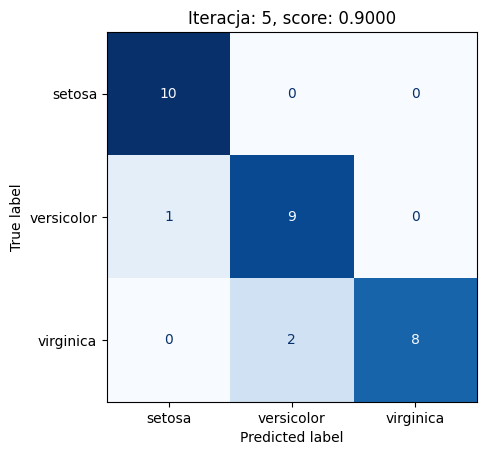

In [158]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# ładowanie datasetu irysów
iris = load_iris()

X = iris.data
y = iris.target

# podział dane uczące, testujące -> 80% i 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

# skalowanie
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accuracy_scores = []
confusion_matrices = []

for i in range(5):
    # mieszamy dane uczące, aby uzyskać różne wyniki
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)

    neuron = Perceptron(tol = 1e-5, max_iter = 300)
    neuron.fit(X_train_shuffled, y_train_shuffled)
    y_pred = neuron.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    confusion_matrices.append(confusion_matrix(y_test, y_pred))

    print(f'Iteracja: {i+1}, score: {accuracy:.4f}')

# score(iter)
plt.scatter(range(1, 6), accuracy_scores, color='r')
plt.xlabel('Iteracja')
plt.ylabel('Score')
plt.title('Skuteczność sieci w 5 różnych iteracjach')
plt.xticks(range(1, 6))
plt.show()

# macierz pomyłek
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(3, 3))
    disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
    disp.plot(cmap='Blues', colorbar=False)
    plt.title(f'Iteracja: {i+1}, score: {accuracy_scores[i]:.4f}')
    plt.show()


# Zadanie 4

Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

50-50: Średnia dokładność = 0.8253, Wariancja = 0.0088
30-70: Średnia dokładność = 0.8267, Wariancja = 0.0052
80-20: Średnia dokładność = 0.8000, Wariancja = 0.0147
Leave-One-Out: Dokładność = 0.8733


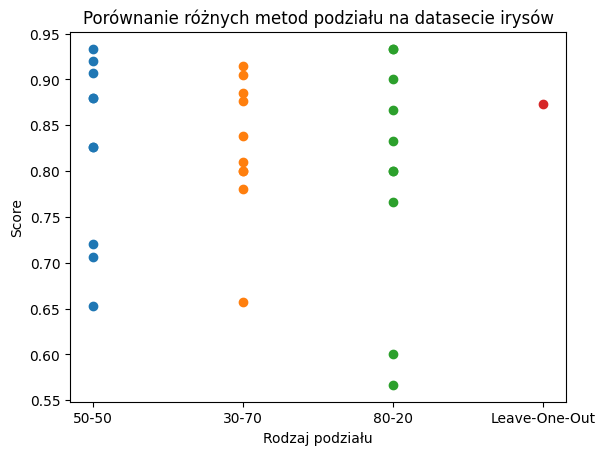

In [199]:
from sklearn.model_selection import LeaveOneOut

splits = {
    '50-50': 0.5,
    '30-70': 0.3,
    '80-20': 0.8
}

accuracy_results = {}
scaler = StandardScaler()

for split_name, train_size in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, stratify=y)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    accuracy_scores = []
    for i in range(10):
        X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train)
        perceptron = Perceptron(tol=1e-5, max_iter=300)
        perceptron.fit(X_train_shuffled, y_train_shuffled)
        y_pred = perceptron.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    accuracy_results[split_name] = accuracy_scores

# leave one out
loo = LeaveOneOut()
loo_accuracies = []

for train_idx, test_idx in loo.split(X):
    X_train_loo, X_test_loo = X[train_idx], X[test_idx]
    y_train_loo, y_test_loo = y[train_idx], y[test_idx]

    scaler_loo = StandardScaler()
    X_train_loo = scaler_loo.fit_transform(X_train_loo)
    X_test_loo = scaler_loo.transform(X_test_loo)

    perceptron = Perceptron(tol=1e-5, max_iter=300)
    perceptron.fit(X_train_loo, y_train_loo)
    y_pred_loo = perceptron.predict(X_test_loo)

    loo_accuracies.append(accuracy_score(y_test_loo, y_pred_loo))

accuracy_results["Leave-One-Out"] = [np.mean(loo_accuracies)]

for split_name, scores in accuracy_results.items():
    if split_name == "Leave-One-Out":
        print(f"{split_name}: Dokładność = {scores[0]:.4f}")
    else:
        print(f"{split_name}: Średnia dokładność = {np.mean(scores):.4f}, "
              f"Wariancja = {np.var(scores):.4f}")

# wykres
for split_name, scores in accuracy_results.items():
    plt.scatter([split_name] * len(scores), scores, label=split_name)

plt.xlabel("Rodzaj podziału")
plt.ylabel("Score")
plt.title("Porównanie różnych metod podziału na datasecie irysów")
plt.show()

# Zadanie 5

Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

Maksymalna liczba epok = 1: Średnia dokładność = 0.7867, Wariancja = 0.0078, Średnia liczby iteracji = 1.00
Maksymalna liczba epok = 2: Średnia dokładność = 0.7933, Wariancja = 0.0033, Średnia liczby iteracji = 2.00
Maksymalna liczba epok = 5: Średnia dokładność = 0.8267, Wariancja = 0.0033, Średnia liczby iteracji = 5.00
Maksymalna liczba epok = 10: Średnia dokładność = 0.8667, Wariancja = 0.0018, Średnia liczby iteracji = 9.80
Maksymalna liczba epok = 20: Średnia dokładność = 0.8933, Wariancja = 0.0006, Średnia liczby iteracji = 13.00
Maksymalna liczba epok = 50: Średnia dokładność = 0.8933, Wariancja = 0.0006, Średnia liczby iteracji = 13.00
Maksymalna liczba epok = 100: Średnia dokładność = 0.8933, Wariancja = 0.0006, Średnia liczby iteracji = 13.00
Maksymalna liczba epok = 300: Średnia dokładność = 0.8933, Wariancja = 0.0006, Średnia liczby iteracji = 13.00


/home/zen1x/AGH/MIO/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zen1x/AGH/MIO/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zen1x/AGH/MIO/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zen1x/AGH/MIO/.venv/lib/python3.13/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zen1x/

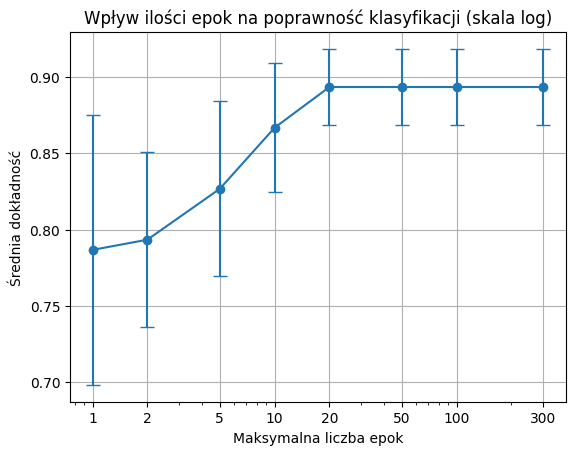

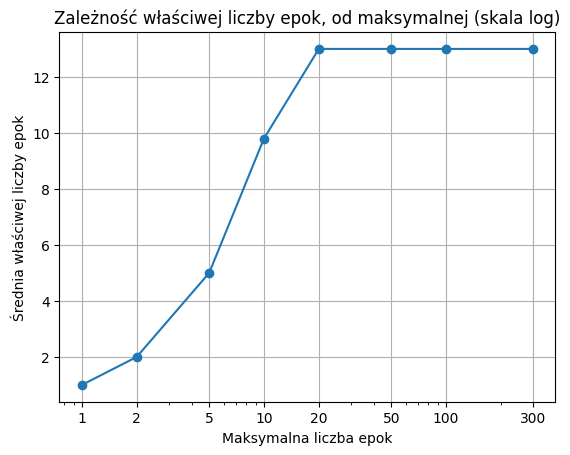

In [213]:
X, y = iris.data, iris.target

# podział 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# liczby epok, na których wykonamy próby
epoch_values = [1, 2, 5, 10, 20, 50, 100, 300]

mean_accuracies = [] # średnie obliczone dla 5 iteracji
variances = [] # wariancje dla 5 iteracji
n_iter_means = [] # średnie właściwych liczb epok

for max_iter in epoch_values:
    accuracies = [] # dokładność dla każdej z 5 iteracji
    n_iter_list = [] # faktyczna liczba epok dla każdej z 5 iteracji
    for i in range(5):
        X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=i)

        neuron = Perceptron(tol=1e-20, max_iter=max_iter)
        neuron.fit(X_train_shuffled, y_train_shuffled)
        y_pred = neuron.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        n_iter_list.append(neuron.n_iter_) # właściwa liczba epok

    mean_acc = np.mean(accuracies)
    var_acc = np.var(accuracies)
    mean_accuracies.append(mean_acc)
    variances.append(var_acc)
    n_iter_means.append(np.mean(n_iter_list))

    print(f"Maksymalna liczba epok = {max_iter}: Średnia dokładność = {mean_acc:.4f}, Wariancja = {var_acc:.4f}, Średnia liczby iteracji = {np.mean(n_iter_list):.2f}")

plt.errorbar(epoch_values, mean_accuracies, yerr=np.sqrt(variances), fmt='-o', capsize=5)
plt.xscale('log')
plt.xticks(epoch_values, epoch_values)
plt.xlabel("Maksymalna liczba epok")
plt.ylabel("Średnia dokładność")
plt.title("Wpływ ilości epok na poprawność klasyfikacji (skala log)")
plt.grid(True)
plt.show()

plt.plot(epoch_values, n_iter_means, '-o')
plt.xscale('log')
plt.xticks(epoch_values, epoch_values)
plt.xlabel("Maksymalna liczba epok")
plt.ylabel("Średnia właściwej liczby epok")
plt.title("Zależność właściwej liczby epok, od maksymalnej (skala log)")
plt.grid(True)
plt.show()
